# 1. Load and Explore Fake News Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
existing_data= pd.read_csv(r"C:\Users\ashish\Downloads\tweets.csv (1)\tweets.csv")
existing_data

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [3]:
fake_news_data = pd.read_csv(r"C:\Users\ashish\Downloads\news.csv\news.csv")
fake_news_data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


# 2. Extract Disaster-Related Tweets

In [4]:
# Define disaster-related keywords
disaster_keywords = ['earthquake', 'flood', 'hurricane', 'wildfire', 'tsunami', 'disaster']

# Filter rows containing disaster keywords in the text column (assuming the text column is named 'text')
fake_news_data['is_disaster'] = fake_news_data['text'].apply(
    lambda x: any(word in x.lower() for word in disaster_keywords))

# Select only disaster-related rows
disaster_tweets = fake_news_data[fake_news_data['is_disaster']]

# Merge with the existing dataset
combined_data = pd.concat([existing_data, disaster_tweets], ignore_index=True)
print(combined_data.head())

    id keyword        location  \
0  0.0  ablaze             NaN   
1  1.0  ablaze             NaN   
2  2.0  ablaze   New York City   
3  3.0  ablaze  Morgantown, WV   
4  4.0  ablaze             NaN   

                                                text  target  Unnamed: 0  \
0  Communal violence in Bhainsa, Telangana. "Ston...     1.0         NaN   
1  Telangana: Section 144 has been imposed in Bha...     1.0         NaN   
2  Arsonist sets cars ablaze at dealership https:...     1.0         NaN   
3  Arsonist sets cars ablaze at dealership https:...     1.0         NaN   
4  "Lord Jesus, your love brings freedom and pard...     0.0         NaN   

  title label is_disaster  
0   NaN   NaN         NaN  
1   NaN   NaN         NaN  
2   NaN   NaN         NaN  
3   NaN   NaN         NaN  
4   NaN   NaN         NaN  


# 3. Data Cleaning and Feature Engineering

In [5]:
# This includes removing punctuation, URLs, stop words, applying stemming, and tokenization.

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stemmer, lemmatizer, and stop words
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words and apply stemming & lemmatization
    tokens = [lemmatizer.lemmatize(stemmer.stem(word)) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the function
combined_data['cleaned_text'] = combined_data['text'].apply(clean_text)
print(combined_data[['text', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                text  \
0  Communal violence in Bhainsa, Telangana. "Ston...   
1  Telangana: Section 144 has been imposed in Bha...   
2  Arsonist sets cars ablaze at dealership https:...   
3  Arsonist sets cars ablaze at dealership https:...   
4  "Lord Jesus, your love brings freedom and pard...   

                                        cleaned_text  
0  commun violenc bhainsa telangana stone pelt mu...  
1  telangana section 144 impos bhainsa januari 13...  
2                  arsonist set car ablaz dealership  
3                  arsonist set car ablaz dealership  
4  lord jesu love bring freedom pardon fill holi ...  


# 4. Visualization

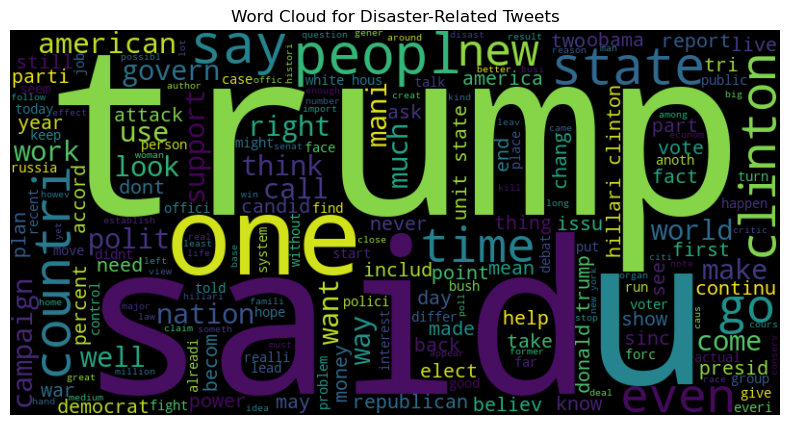

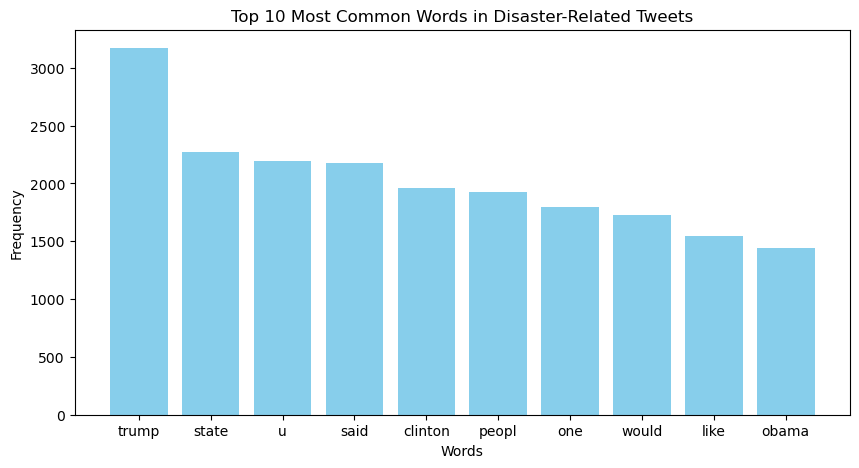

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Fill NaN values in 'is_disaster' column with False
combined_data['is_disaster'] = combined_data['is_disaster'].fillna(False)


# Word cloud for disaster-related tweets
disaster_text = ' '.join(combined_data[combined_data['is_disaster']]['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(disaster_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Disaster-Related Tweets")
plt.show()

# Bar plot for the most common words
from collections import Counter

# Get the most common words
words = disaster_text.split()
word_counts = Counter(words)
common_words = word_counts.most_common(10)

# Bar plot
words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Disaster-Related Tweets')
plt.show()


# 5. Feature Engineering for Modeling

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(combined_data['cleaned_text']).toarray()

# Create a target variable (dummy example: Predicting 'is_disaster' as a target for binary classification)
y = combined_data['is_disaster'].astype(int)


# 6. Model Building  Logistic Regression , Random Forest ,SVM
    

In [11]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression Accuracy: 0.99
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      3412
           1       1.00      0.80      0.89       131

    accuracy                           0.99      3543
   macro avg       1.00      0.90      0.94      3543
weighted avg       0.99      0.99      0.99      3543

Random Forest Accuracy: 1.00
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3412
           1       1.00      0.88      0.93       131

    accuracy                           1.00      3543
   macro avg       1.00      0.94      0.97      3543
weighted avg       1.00      1.00      1.00      3543

Support Vector Machine (SVM) Accuracy: 1.00
Classification Report for Support Vector Machine (SVM):
               precision    recall  f1-score   support

           0       1.00      1.00   

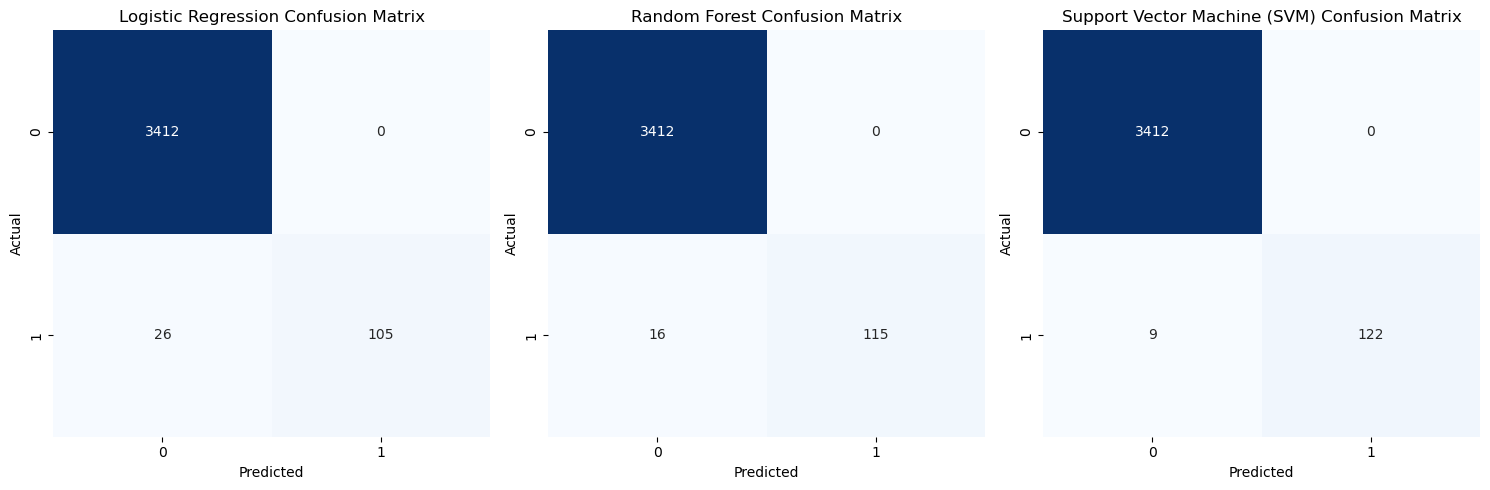

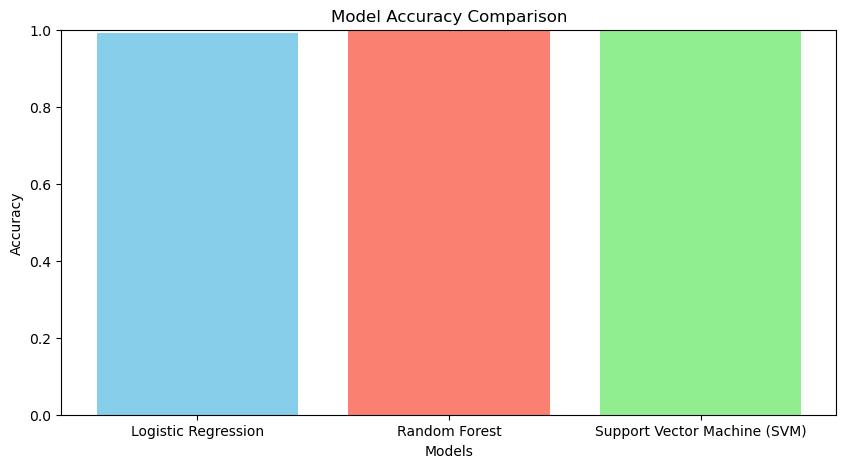

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine (SVM)": SVC()
}

# Dictionary to store model results
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on test data
    y_pred = model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Save results
    results[model_name] = {
        "model": model,
        "accuracy": accuracy,
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))

# Visualization of Confusion Matrices
plt.figure(figsize=(15, 5))
for i, (model_name, result) in enumerate(results.items()):
    plt.subplot(1, 3, i + 1)
    sns.heatmap(result["confusion_matrix"], annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Plotting accuracy comparison
model_names = list(results.keys())
accuracies = [results[model_name]["accuracy"] for model_name in model_names]

plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracies, color=['skyblue', 'salmon', 'lightgreen'])
plt.ylim(0, 1)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()
